In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df = df.dropna()

In [5]:
df['BloodPressure'] = np.where(df['BloodPressure'] == 0, np.nan, df['BloodPressure'])
df['SkinThickness'] = np.where(df['SkinThickness'] == 0, np.nan, df['SkinThickness'])

In [6]:
df = df.dropna()

In [7]:
from scipy.stats import zscore

In [8]:
X = df.drop('Outcome', axis = 1)
Y = df['Outcome']

In [9]:
X = zscore(X)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, shuffle = False)

In [87]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=21)

In [88]:
predictions = knn.predict(X_test)

In [89]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print(confusion_matrix(Y_test,predictions))
print(' ')
print(classification_report(Y_test,predictions))

[[101   7]
 [ 22  32]]
 
              precision    recall  f1-score   support

           0       0.82      0.94      0.87       108
           1       0.82      0.59      0.69        54

    accuracy                           0.82       162
   macro avg       0.82      0.76      0.78       162
weighted avg       0.82      0.82      0.81       162



In [90]:
from sklearn.metrics import precision_score
precision_score(Y_test, predictions, average='micro')

0.8209876543209876

In [91]:
from sklearn.metrics import mean_squared_error
np.sqrt((mean_squared_error(Y_test, predictions)))

0.42309850588132825

In [85]:
error = [0.521, 0.464, 0.458, 0.490, 0.477, 0.471, 0.464, 0.451, 0.423, 0.437]
K = [1,3,5,7, 9, 11, 13, 15, 21, 31]

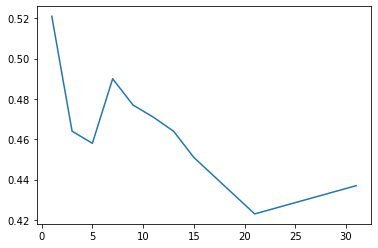

In [86]:
plt.plot(K,error)